In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import scipy as sp
from scipy import signal
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (15,6)

In [3]:
df = pd.read_csv(r'data\random_accel_data.csv')
time = df['Time (s)'].to_numpy()
df.set_index('Time (s)', inplace=True)
df

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
Time (s),,,,
0.000000,4.730035,6.710874,4.116339,9.184405
0.005037,4.873765,6.763575,3.895953,9.202064
0.010102,4.993540,6.744411,3.735455,9.185648
0.015139,5.132479,6.677337,3.630053,9.170957
0.020175,5.261836,6.547980,3.536628,9.114313
...,...,...,...,...
59.977040,3.743089,3.606306,8.358770,9.843028
59.982077,3.817349,4.099779,8.610298,10.272175
59.987114,3.496352,4.715422,8.854639,10.623762


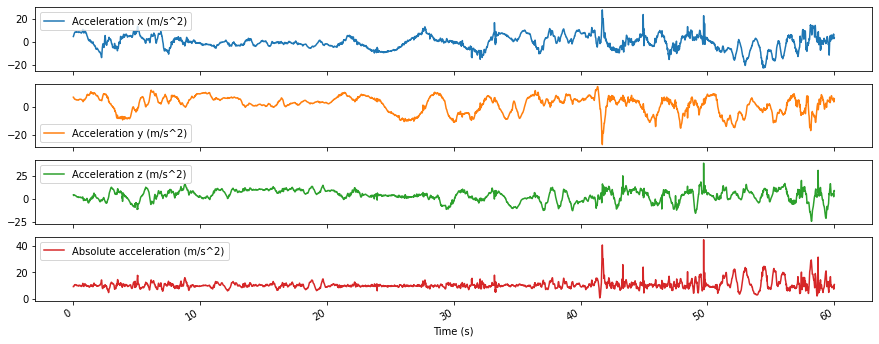

In [4]:
df.plot(subplots=True);

In [5]:
WINDOW = 5

df['SMA_x'] = df.loc[:, 'Acceleration x (m/s^2)'].rolling(window=WINDOW).mean()
df['SMA_y'] = df.loc[:, 'Acceleration y (m/s^2)'].rolling(window=WINDOW).mean()
df['SMA_z'] = df.loc[:, 'Acceleration z (m/s^2)'].rolling(window=WINDOW).mean()
df['SMA_abs'] = df.loc[:, 'Absolute acceleration (m/s^2)'].rolling(window=WINDOW).mean()
df.dropna(inplace=True)

# Simple Moving Average Filter

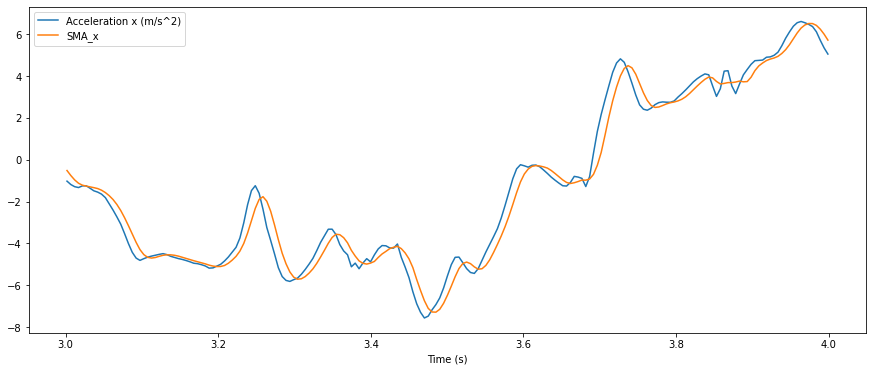

In [6]:
ax1 = df.loc[3:4].plot(y=["Acceleration x (m/s^2)", "SMA_x"])

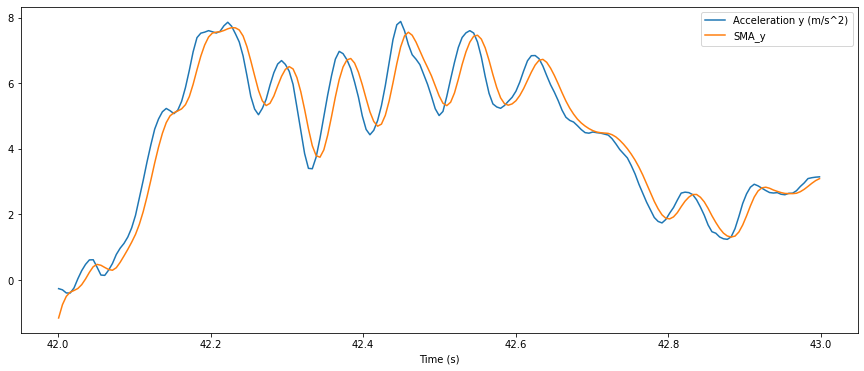

In [7]:
ay = df.loc[42:43].plot(y=["Acceleration y (m/s^2)", "SMA_y"])

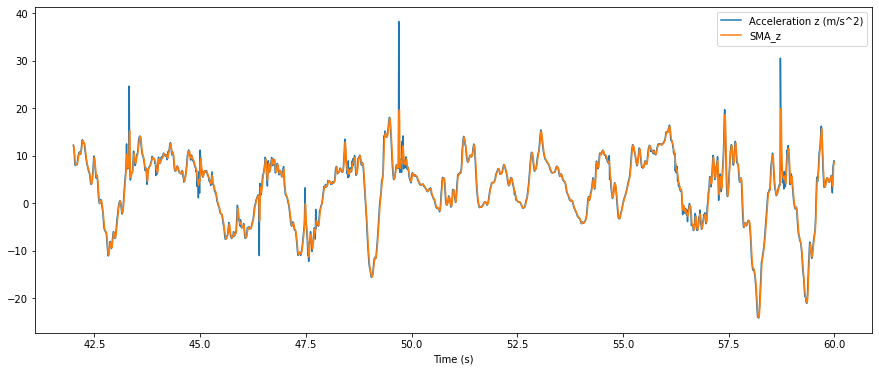

In [8]:
az = df.loc[42:].plot(y=["Acceleration z (m/s^2)", "SMA_z"])

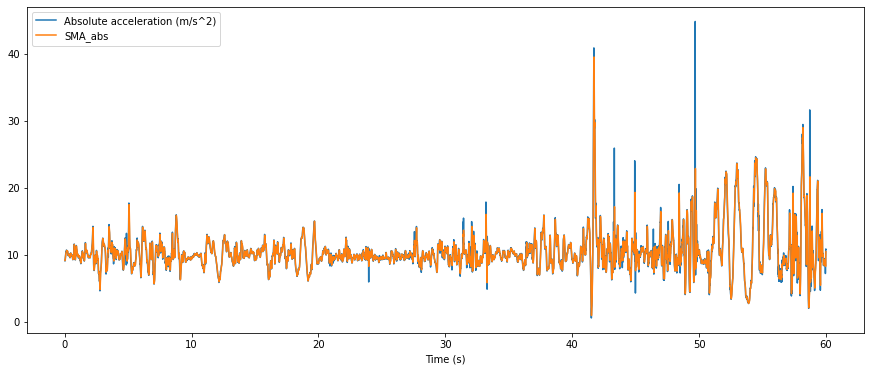

In [9]:
df.plot(y=["Absolute acceleration (m/s^2)", "SMA_abs"])

# Based on Envelope 

# Exponential Moving Average Filters


In [10]:
alpha = 0.15

df['EMA_x'] = df.loc[:, 'Acceleration x (m/s^2)'].ewm(alpha=alpha).mean()
df['EMA_y'] = df.loc[:, 'Acceleration y (m/s^2)'].ewm(alpha=alpha).mean()
df['EMA_z'] = df.loc[:, 'Acceleration z (m/s^2)'].ewm(alpha=alpha).mean()

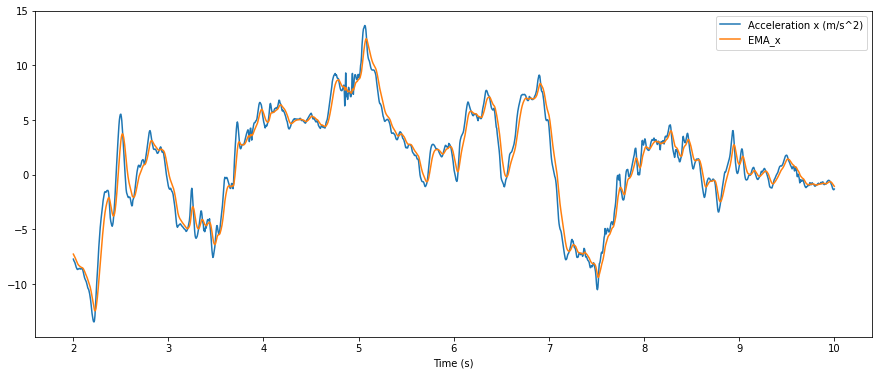

In [11]:
ax1 = df.loc[2:10].plot(y=["Acceleration x (m/s^2)", "EMA_x"])

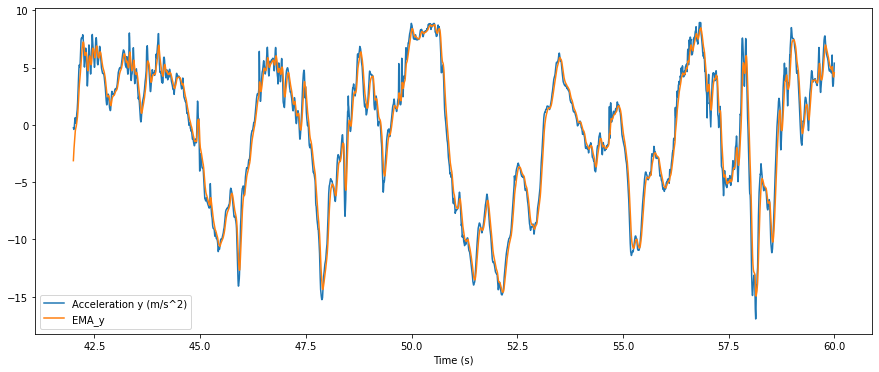

In [12]:
ax1 = df.loc[42:].plot(y=["Acceleration y (m/s^2)", "EMA_y"])

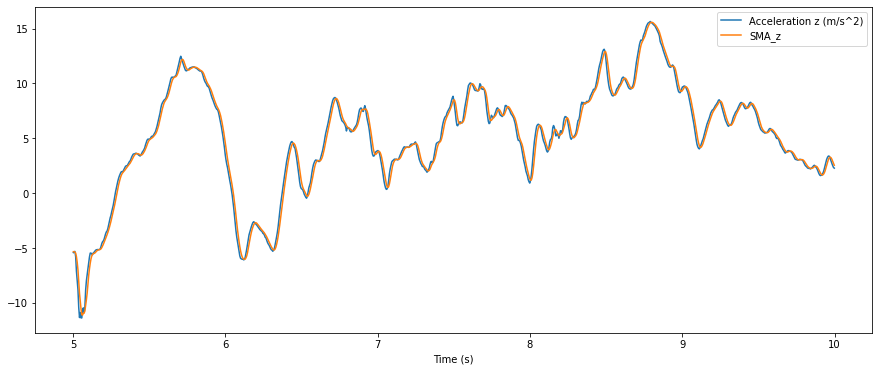

In [13]:
ax1 = df.loc[5:10].plot(y=["Acceleration z (m/s^2)", "SMA_z"])

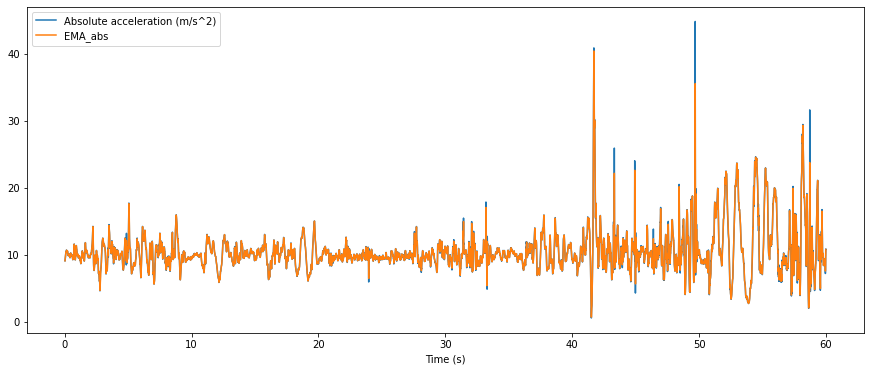

In [14]:
df['EMA_abs'] = df.loc[:, 'Absolute acceleration (m/s^2)'].ewm(com=0.5).mean()
ax1 = df.plot(y=["Absolute acceleration (m/s^2)", "EMA_abs"])

The exponential moving average has a lower delay and is more sensitive as compared to simple moving average 

# Savitzky-Golay Filters

In [15]:
WINDOW_LENGTH = 21
POLY_ORDER = 5

df['savgol_x'] = sp.signal.savgol_filter(df['Acceleration x (m/s^2)'], window_length=WINDOW_LENGTH, polyorder=POLY_ORDER)
df['savgol_y'] = sp.signal.savgol_filter(df['Acceleration y (m/s^2)'], window_length=WINDOW_LENGTH, polyorder=POLY_ORDER)
df['savgol_z'] = sp.signal.savgol_filter(df['Acceleration z (m/s^2)'], window_length=WINDOW_LENGTH, polyorder=POLY_ORDER)
df['savgol_abs'] = sp.signal.savgol_filter(df['Absolute acceleration (m/s^2)'], window_length=WINDOW_LENGTH, polyorder=POLY_ORDER)

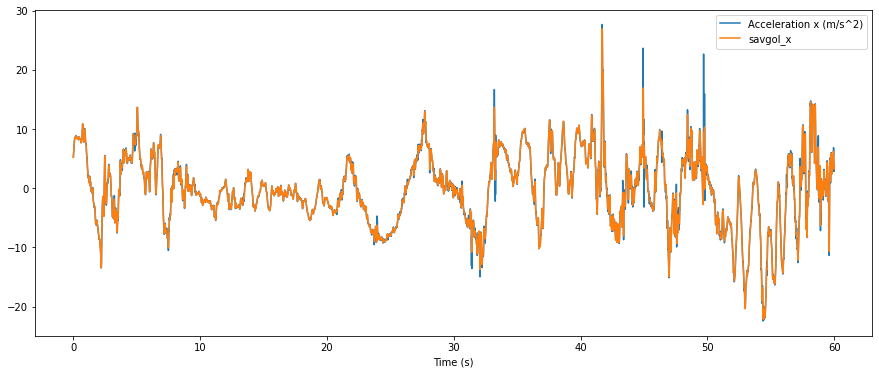

In [16]:
df.plot(y=["Acceleration x (m/s^2)", "savgol_x"])

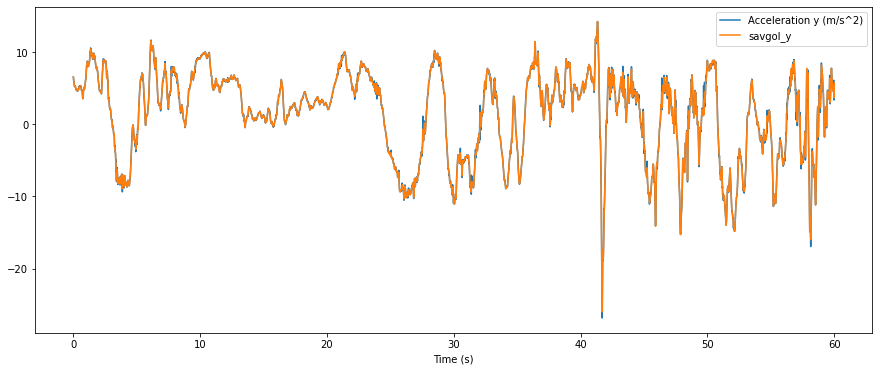

In [17]:
df.plot(y=["Acceleration y (m/s^2)", "savgol_y"])

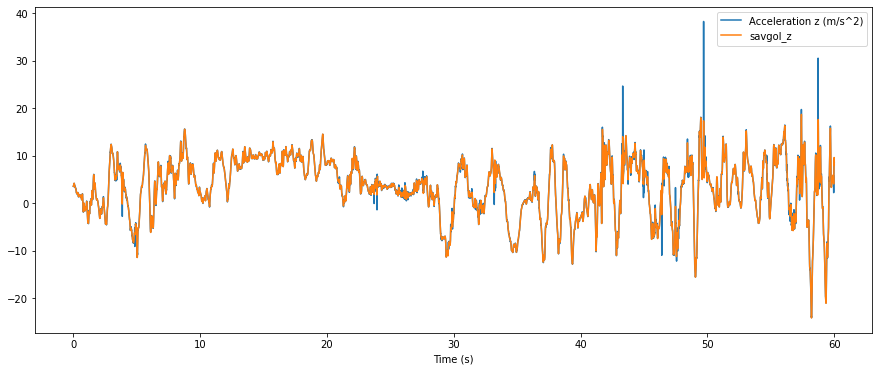

In [18]:
df.plot(y=["Acceleration z (m/s^2)", "savgol_z"])

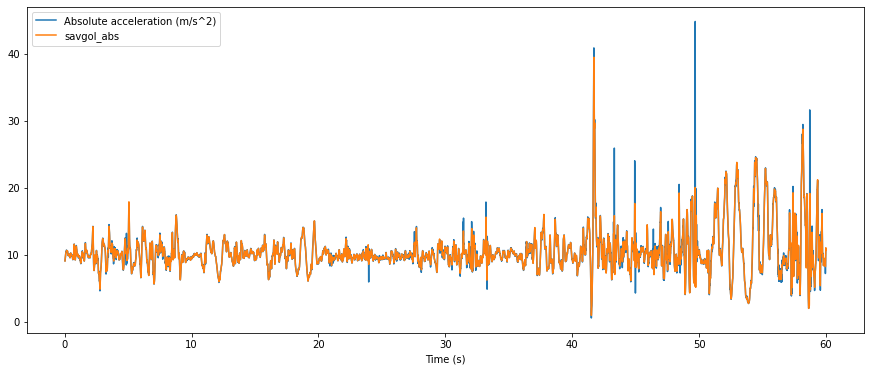

In [19]:
df.plot(y=["Absolute acceleration (m/s^2)", "savgol_abs"])

# Median Filter

In [20]:
KERNEL_SIZE = 55

df['median_x'] = sp.signal.medfilt(df['Acceleration x (m/s^2)'], kernel_size=KERNEL_SIZE)
df['median_y'] = sp.signal.medfilt(df['Acceleration y (m/s^2)'], kernel_size=KERNEL_SIZE)
df['median_z'] = sp.signal.medfilt(df['Acceleration z (m/s^2)'], kernel_size=KERNEL_SIZE)
df['median_abs'] = sp.signal.medfilt(df['Absolute acceleration (m/s^2)'], kernel_size=KERNEL_SIZE)

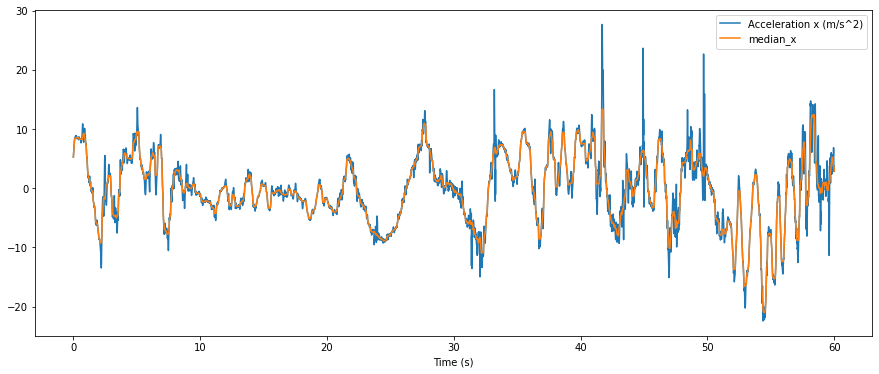

In [21]:
df.plot(y=["Acceleration x (m/s^2)", "median_x"])

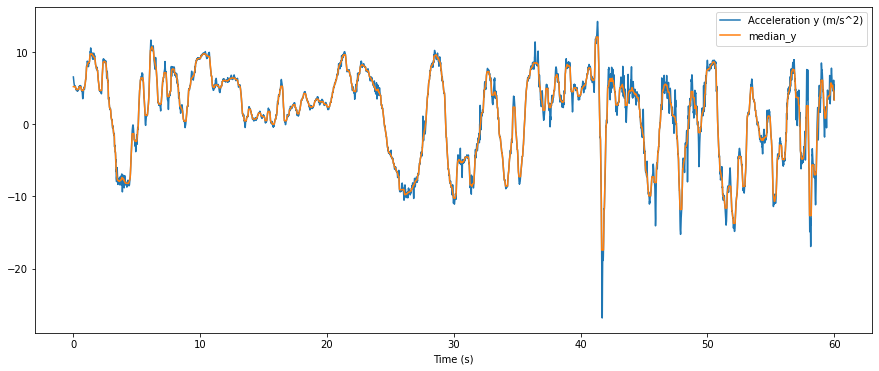

In [22]:
df.plot(y=["Acceleration y (m/s^2)", "median_y"])

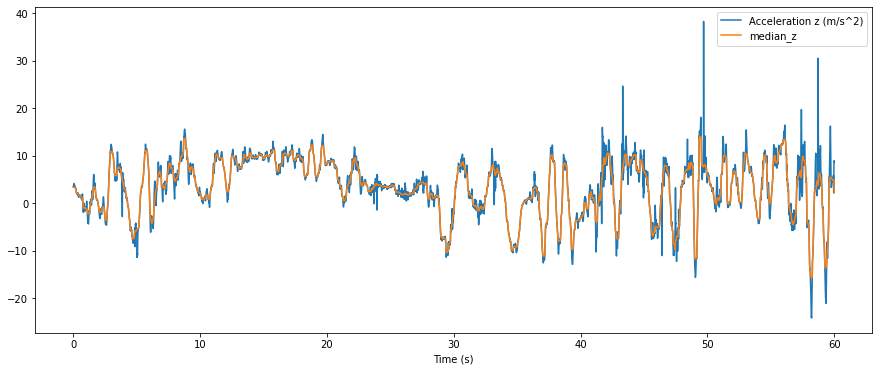

In [23]:
df.plot(y=["Acceleration z (m/s^2)", "median_z"])

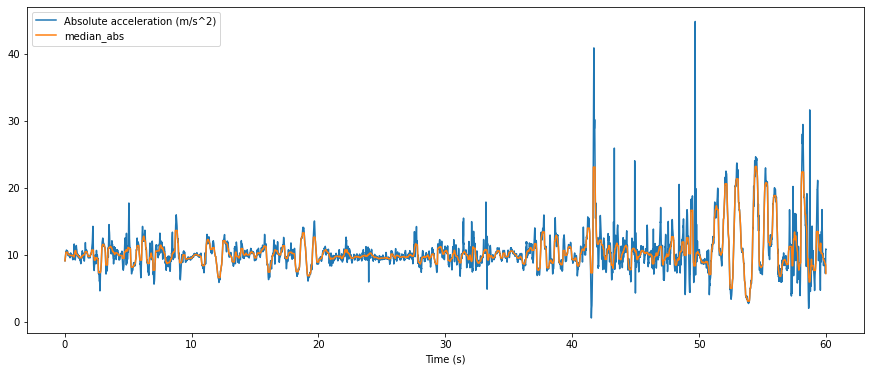

In [24]:
df.plot(y=["Absolute acceleration (m/s^2)", "median_abs"])

# Outlier Removal via Hampel Filter

In [25]:
def hampel(vals_orig, window_size=7, t0=3):
    '''
    vals: pandas series of values from which to remove outliers
    k: size of window (including the sample; 7 is equal to 3 on either side of value)
    '''

    #Make copy so original not edited
    vals = vals_orig.copy()

    #Hampel Filter
    L = 1.4826
    rolling_median = vals.rolling(window=window_size, center=True).median()
    MAD = lambda x: np.median(np.abs(x - np.median(x)))
    rolling_MAD = vals.rolling(window=window_size, center=True).apply(MAD)
    threshold = t0 * L * rolling_MAD
    difference = np.abs(vals - rolling_median)

    '''
    Perhaps a condition should be added here in the case that the threshold value
    is 0.0; maybe do not mark as outlier. MAD may be 0.0 without the original values
    being equal. See differences between MAD vs SDV.
    '''

    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

In [26]:
WINDOW_SIZE = 151

df['hampel_x'] = hampel(df['Acceleration x (m/s^2)'], window_size=WINDOW_SIZE)
df['hampel_y'] = hampel(df['Acceleration y (m/s^2)'], window_size=WINDOW_SIZE)
df['hampel_z'] = hampel(df['Acceleration z (m/s^2)'], window_size=WINDOW_SIZE)
df['hampel_abs'] = hampel(df['Absolute acceleration (m/s^2)'], window_size=WINDOW_SIZE)

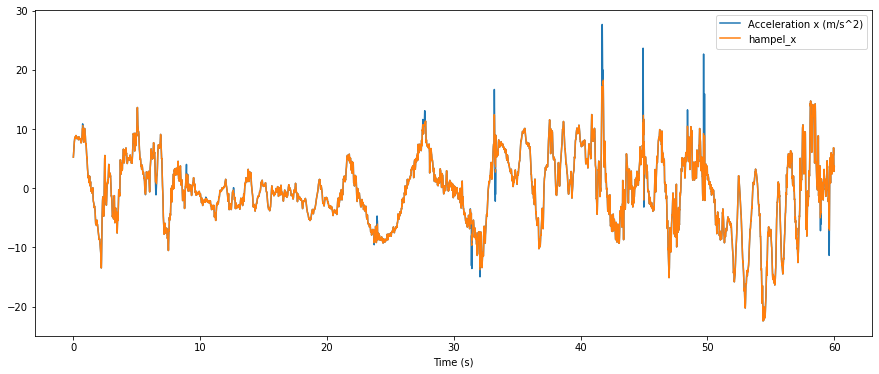

In [27]:
df.plot(y=["Acceleration x (m/s^2)", "hampel_x"])

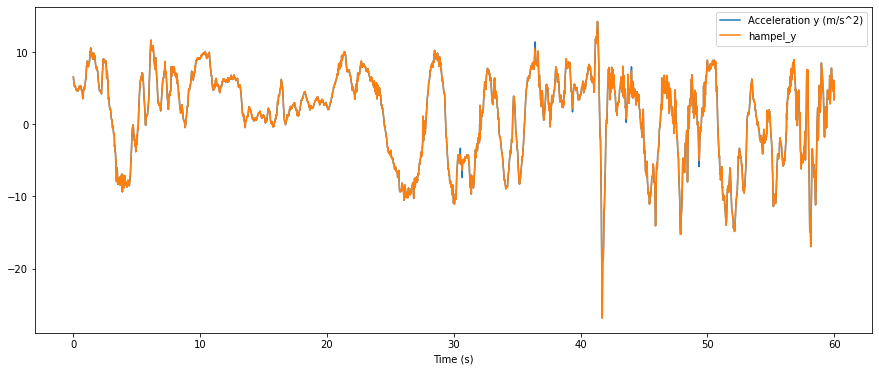

In [28]:
df.plot(y=["Acceleration y (m/s^2)", "hampel_y"])

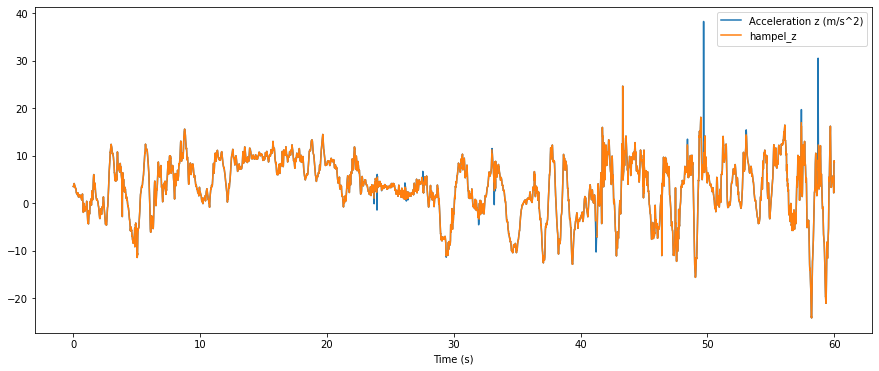

In [29]:
df.plot(y=["Acceleration z (m/s^2)", "hampel_z"])

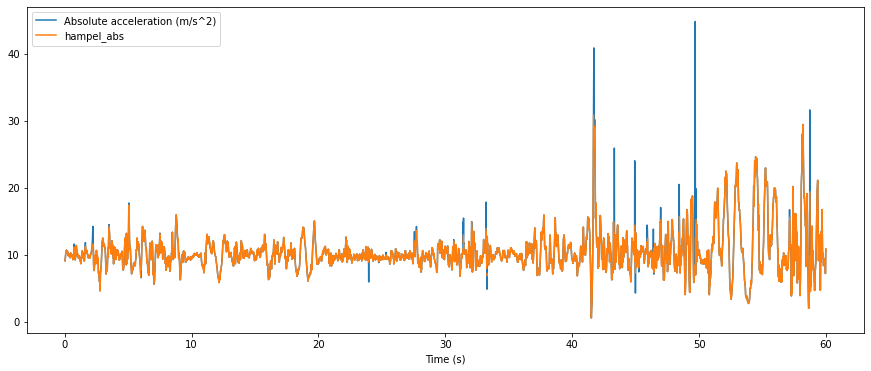

In [30]:
df.plot(y=["Absolute acceleration (m/s^2)", "hampel_abs"])

The main problem in this filter is that the data in the region with outliers is replaced by NaN. Hence, the data is not continuous anymore.